# Term Deposit for Bank

## Goal:
### - Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 

## Data Used:
### - The Data provided in Excel.
### Input variables:
#### Bank Client Data:
* 1 - age (numeric)
* 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
* 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

* 4 - education (categorical: "unknown","secondary","primary","tertiary")

* 5 - default: has credit in default? (binary: "yes","no")

* 6 - balance: average yearly balance, in euros (numeric) 

* 7 - housing: has housing loan? (binary: "yes","no")

* 8 - loan: has personal loan? (binary: "yes","no")
#### Related with the last contact of the current campaign:
* 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

* 10 - day: last contact day of the month (numeric)

* 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

* 12 - duration: last contact duration, in seconds (numeric)
#### Other attributes:
* 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
#### Output variable (desired target):
* 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

### Since the Target variable had an under-represented number of YES responses, had to edit the Excel Data File and increase the number of Data Points having the target response as YES (by menthod of copy pasting all the YES response data points several times)

#### Step 1 : Importing all the requisite libabries

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

#### Step 2 : Loading the data file into the Data Frame

In [135]:
bank_df = pd.read_csv('bank-full - Copy.csv')

#### Step 3 : View the first 10 records of the Data Frame as an intial step for Exploratory Data Analysis (EDA)

In [136]:
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### Step 4 : As part of EDA, checking out the Data Types as well as the NULL values (if any) with in the current data frame

In [137]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66367 entries, 0 to 66366
Data columns (total 17 columns):
age          66367 non-null int64
job          66367 non-null object
marital      66367 non-null object
education    66367 non-null object
default      66367 non-null object
balance      66367 non-null int64
housing      66367 non-null object
loan         66367 non-null object
contact      66367 non-null object
day          66367 non-null int64
month        66367 non-null object
duration     66367 non-null int64
campaign     66367 non-null int64
pdays        66367 non-null int64
previous     66367 non-null int64
poutcome     66367 non-null object
Target       66367 non-null object
dtypes: int64(7), object(10)
memory usage: 8.6+ MB


#### Observation :
There are 10 columns of data type Object

#### Step 5 : Convert all Object data types into Category data types

In [138]:
bank_df['job']=bank_df['job'].astype('category')
bank_df['marital']=bank_df['marital'].astype('category')
bank_df['education']=bank_df['education'].astype('category')
bank_df['default']=bank_df['default'].astype('category')
bank_df['housing']=bank_df['housing'].astype('category')
bank_df['loan']=bank_df['loan'].astype('category')
bank_df['contact']=bank_df['contact'].astype('category')
bank_df['month']=bank_df['month'].astype('category')
bank_df['poutcome']=bank_df['poutcome'].astype('category')
bank_df['Target']=bank_df['Target'].astype('category')

#### Step 6 : Check whether there are any "?" present within the data amoungst the categorical variables

In [139]:
for value in ['job','marital','education','default','housing','loan','contact','month','poutcome','Target']:
    print(value,":", sum(bank_df[value] == '?'))

job : 0
marital : 0
education : 0
default : 0
housing : 0
loan : 0
contact : 0
month : 0
poutcome : 0
Target : 0


## Univariate analysis
* Numerical variables - boxplot, histogram
* Categorical variables - value_count

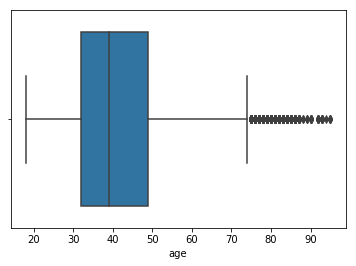

In [140]:
sns.boxplot(bank_df['age'])

#### Possible outliers beyond 70 years of age

In [141]:
bank_df['job'].value_counts(normalize=True)

management       0.220923
blue-collar      0.189311
technician       0.165097
admin.           0.115946
services         0.084831
retired          0.065213
self-employed    0.035063
unemployed       0.031808
student          0.030346
entrepreneur     0.029819
housemaid        0.025254
unknown          0.006389
Name: job, dtype: float64

#### Management jobs are the highest population who have accepted Term Deposits

In [142]:
bank_df['marital'].value_counts(normalize=True)

married     0.576100
single      0.307954
divorced    0.115946
Name: marital, dtype: float64

#### Married polpulation were the ones who have preferred to opt for Term Deposits

In [143]:
bank_df['education'].value_counts(normalize=True)

secondary    0.497265
tertiary     0.320717
primary      0.138849
unknown      0.043169
Name: education, dtype: float64

#### Close to half the popultaion who opted for Term Deposits has Secondary level of education

In [144]:
bank_df['default'].value_counts(normalize=True)

no     0.984586
yes    0.015414
Name: default, dtype: float64

#### Under-representation for YES response

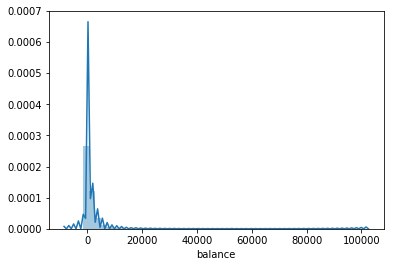

In [145]:
sns.distplot(bank_df['balance'])

#### Long right tail is suggestive of possible outliers

In [146]:
bank_df['housing'].value_counts(normalize=True)

no     0.504724
yes    0.495276
Name: housing, dtype: float64

#### Equal representation for YES and NO responses

In [147]:
bank_df['loan'].value_counts(normalize=True)

no     0.861678
yes    0.138322
Name: loan, dtype: float64

#### Under-representation for YES response

In [148]:
bank_df['contact'].value_counts(normalize=True)

cellular     0.704582
unknown      0.228125
telephone    0.067292
Name: contact, dtype: float64

#### Cellular reponses constitute the majority representaion

In [149]:
bank_df['day'].value_counts(normalize=True)

20    0.053038
18    0.048518
21    0.042642
5     0.041738
14    0.040502
6     0.040020
15    0.040005
30    0.039929
8     0.039869
17    0.039824
12    0.038860
13    0.038408
7     0.036841
28    0.036193
4     0.035635
9     0.034309
29    0.034068
19    0.033827
11    0.033194
16    0.032893
2     0.030452
3     0.026986
27    0.025932
22    0.022918
26    0.022587
23    0.021743
25    0.020673
10    0.015188
31    0.012461
24    0.010472
1     0.010276
Name: day, dtype: float64

In [150]:
bank_df['month'].value_counts(normalize=True)

may    0.263173
jul    0.141682
aug    0.135594
jun    0.113385
nov    0.084108
apr    0.078955
feb    0.066494
oct    0.030587
jan    0.029698
sep    0.024937
mar    0.022134
dec    0.009252
Name: month, dtype: float64

#### Almost a third of the popultaion seems to have responded to Term Deposists in the month of May

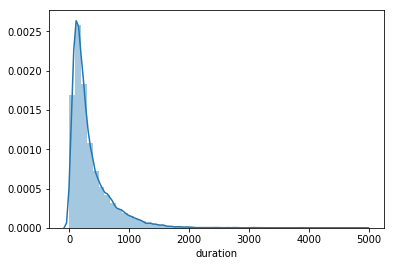

In [174]:
sns.distplot(bank_df['duration'])

#### Long right tail is suggestive of possible outliers

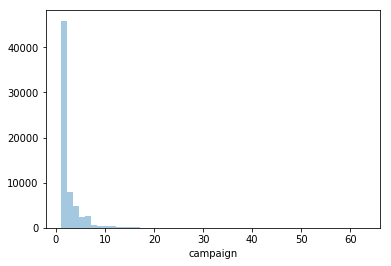

In [152]:
sns.distplot(bank_df['campaign'],kde=False)

#### Long right tail is suggestive of possible outliers

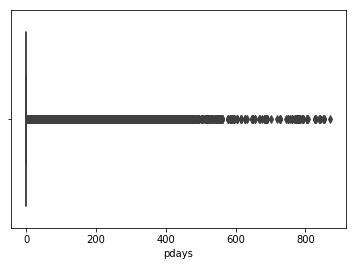

In [153]:
sns.boxplot(bank_df['pdays'])

#### Possibility for outliers

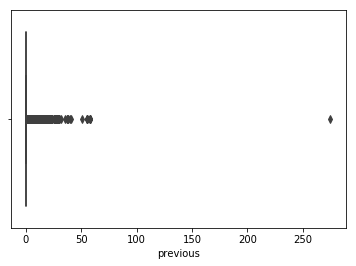

In [154]:
sns.boxplot(bank_df['previous'])

#### Possibility for outliers

In [155]:
bank_df['poutcome'].value_counts(normalize=True)

unknown    0.760966
failure    0.111094
success    0.081712
other      0.046228
Name: poutcome, dtype: float64

In [156]:
bank_df['Target'].value_counts(normalize=True)

no     0.601534
yes    0.398466
Name: Target, dtype: float64

#### The data is skewed towards the NO reposnse.
This is despite upsampling, which had completely exhausted the capacity of an excel file by 66k+ records

## Bivariate Analysis

In [157]:
bank_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.109203,-0.003993,-0.002955,-0.005039,-0.001915,0.017395
balance,0.109203,1.000000,0.005406,0.020820,-0.016783,0.014183,0.025412
day,-0.003993,0.005406,1.000000,-0.014810,0.143116,-0.072437,-0.051354
duration,-0.002955,0.020820,-0.014810,1.000000,-0.048460,-0.020093,-0.012603
campaign,-0.005039,-0.016783,0.143116,-0.048460,1.000000,-0.099588,-0.047896
pdays,-0.001915,0.014183,-0.072437,-0.020093,-0.099588,1.000000,0.463165
previous,0.017395,0.025412,-0.051354,-0.012603,-0.047896,0.463165,1.000000


#### Only the int / float datatypes are represented in the correlation matrix
Suggets that there is a strong correlation between "pdays" and "previous" attributes

#### Pair panel Analysis

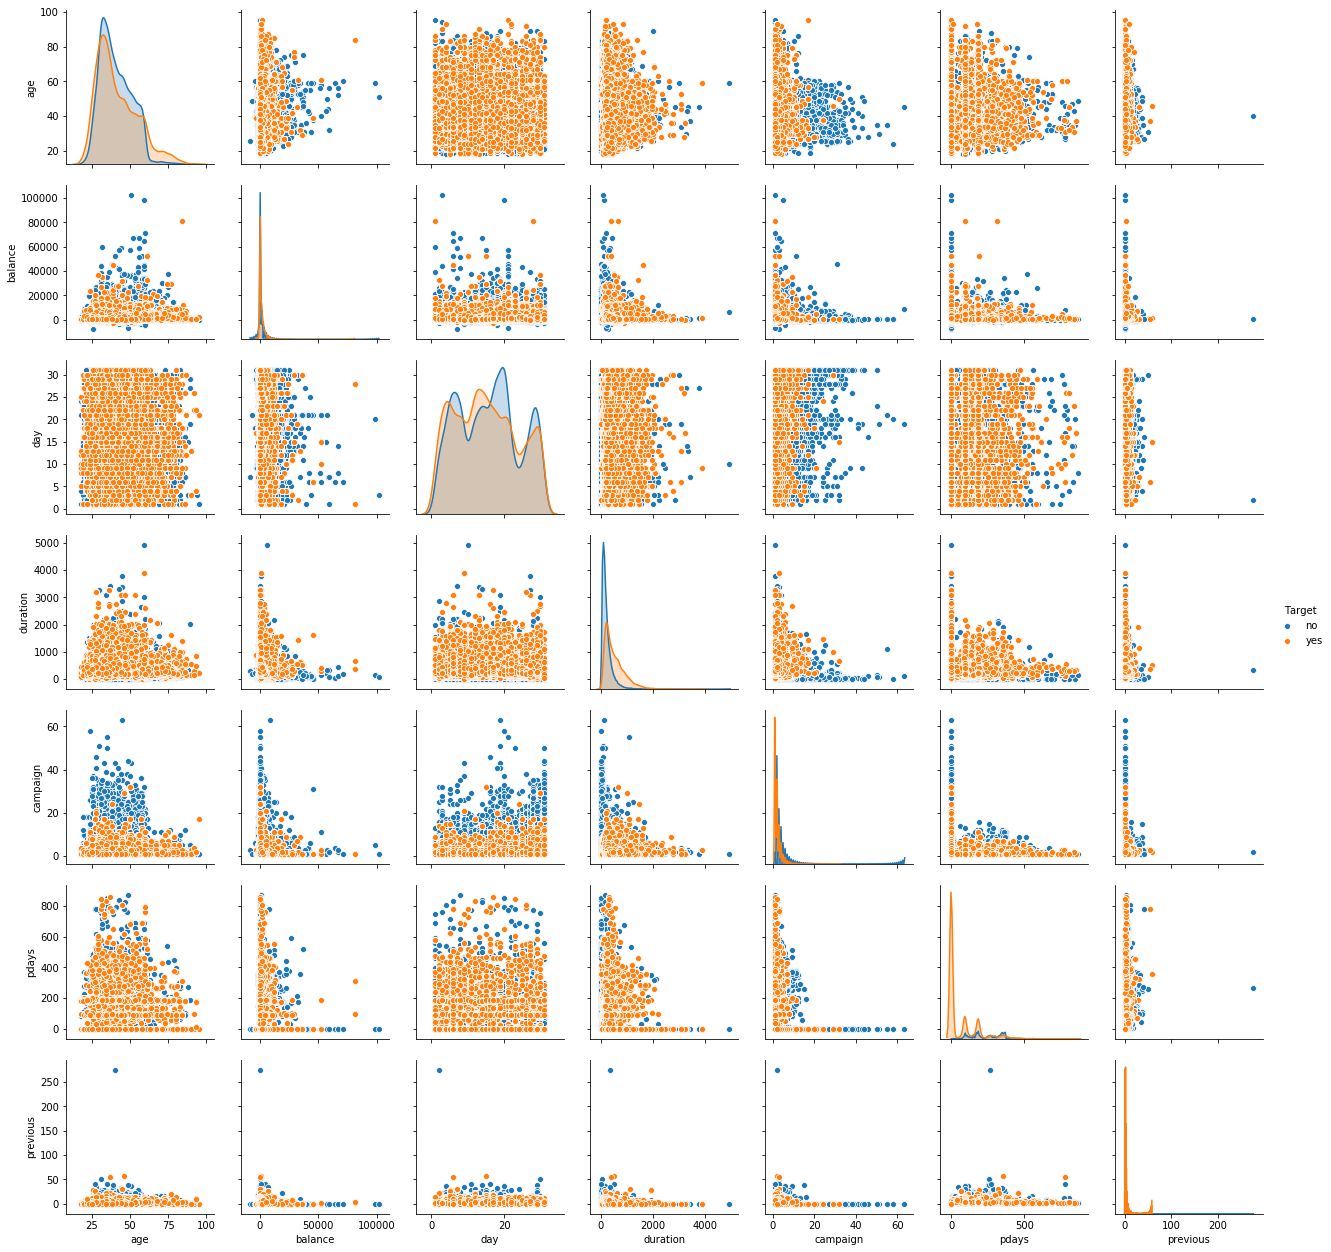

In [158]:
sns.pairplot(bank_df, diag_kind="kde", hue = "Target")

## Descriptive Statistics

In [159]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,66367.0,41.170145,11.618840,18.0,32.0,39.0,49.0,95.0
balance,66367.0,1503.168352,3203.828463,-8019.0,108.0,527.0,1653.0,102127.0
day,66367.0,15.599801,8.385263,1.0,8.0,15.0,21.0,31.0
duration,66367.0,347.142631,333.475149,0.0,130.0,235.0,450.0,4918.0
campaign,66367.0,2.565311,2.792772,1.0,1.0,2.0,3.0,63.0
pdays,66367.0,49.284494,107.266549,-1.0,-1.0,-1.0,-1.0,871.0
previous,66367.0,0.768409,2.401633,0.0,0.0,0.0,0.0,275.0


#### Categorical values cannot be compared here

In [175]:
bank_df_rev = bank_df.copy(deep=True)

#### Include parameter is used in order to view all Attributes

In [161]:
bank_df_rev.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,66367,NaN,NaN,NaN,41.1701,11.6188,18,32,39,49,95
job,66367,12,management,14662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,66367,3,married,38234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,66367,4,secondary,33002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,66367,2,no,65344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,66367,NaN,NaN,NaN,1503.17,3203.83,-8019,108,527,1653,102127
housing,66367,2,no,33497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,66367,2,no,57187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,66367,3,cellular,46761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,66367,NaN,NaN,NaN,15.5998,8.38526,1,8,15,21,31


### Data Preprocessing
#### Label Encoding is done in order to convert categorical variables into numbers so that the variables can be better understood by  the Machine Learning algorithm to make accurate classifications

In [162]:
1`# Label Encoding 
le = preprocessing.LabelEncoder()
job_cat = le.fit_transform(bank_df.job)
marital_cat = le.fit_transform(bank_df.marital)
education_cat = le.fit_transform(bank_df.education)
default_cat = le.fit_transform(bank_df.default)
housing_cat = le.fit_transform(bank_df.housing)
loan_cat = le.fit_transform(bank_df.loan)
contact_cat = le.fit_transform(bank_df.contact)
month_cat = le.fit_transform(bank_df.month)
poutcome_cat = le.fit_transform(bank_df.poutcome)
Target_cat = le.fit_transform(bank_df.Target)

In [163]:
#initialize the encoded categorical columns
bank_df_rev['job_cat'] = job_cat
bank_df_rev['marital_cat'] = marital_cat
bank_df_rev['education_cat'] = education_cat
bank_df_rev['default_cat'] = default_cat
bank_df_rev['housing_cat'] = housing_cat
bank_df_rev['loan_cat'] = loan_cat
bank_df_rev['contact_cat'] = contact_cat
bank_df_rev['month_cat'] = month_cat
bank_df_rev['poutcome_cat'] = poutcome_cat
bank_df_rev['Target_cat'] = Target_cat

In [164]:
#drop the old categorical columns from dataframe
dummy_fields = ['job','marital','education','default','housing','loan', 'contact', 'month','poutcome','Target']
bank_df_rev = bank_df_rev.drop(dummy_fields, axis = 1)

In [165]:
# Re-index the new dataframe and view it
bank_df_rev = bank_df_rev.reindex(['age', 'job_cat', 'marital_cat', 'education_cat',
                                    'default_cat', 'balance', 'housing_cat',
                                    'loan_cat', 'contact_cat', 'day', 'month_cat',
                                    'duration', 'campaign', 'pdays', 
                                    'previous','poutcome_cat','Target_cat'], axis= 1)
bank_df_rev.head(5)

,age,job_cat,marital_cat,education_cat,default_cat,balance,housing_cat,loan_cat,contact_cat,day,month_cat,duration,campaign,pdays,previous,poutcome_cat,Target_cat
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


#### The correlation matrix will now take into account all the attributes while giving it's output as shown below

In [167]:
bank_df_rev.corr()

,age,job_cat,marital_cat,education_cat,default_cat,balance,housing_cat,loan_cat,contact_cat,day,month_cat,duration,campaign,pdays,previous,poutcome_cat,Target_cat
age,1.000000,-0.027295,-0.433580,-0.121585,-0.019875,0.109203,-0.178930,-0.029469,0.026758,-0.003993,-0.029967,-0.002955,-0.005039,-0.001915,0.017395,-0.003670,0.035020
job_cat,-0.027295,1.000000,0.076628,0.152906,-0.010858,0.022666,-0.138597,-0.048365,-0.089301,0.017377,-0.080879,0.004582,-0.004407,-0.005077,0.012468,-0.001859,0.062105
marital_cat,-0.433580,0.076628,1.000000,0.122186,-0.008930,-0.000658,-0.029274,-0.049153,-0.055486,-0.003744,-0.008530,0.007876,-0.016840,0.020629,0.017882,-0.021328,0.067891
education_cat,-0.121585,0.152906,0.122186,1.000000,-0.012316,0.067145,-0.107252,-0.060646,-0.122113,0.011793,-0.053238,-0.009473,-0.005302,0.017918,0.026497,-0.034616,0.100828
default_cat,-0.019875,-0.010858,-0.008930,-0.012316,1.000000,-0.063476,0.010845,0.077762,0.026413,0.007751,0.005946,-0.007702,0.017066,-0.032936,-0.027658,0.038493,-0.036882
balance,0.109203,0.022666,-0.000658,0.067145,-0.063476,1.000000,-0.080845,-0.088265,-0.033293,0.005406,0.010830,0.020820,-0.016783,0.014183,0.025412,-0.028727,0.076491
housing_cat,-0.178930,-0.138597,-0.029274,-0.107252,0.010845,-0.080845,1.000000,0.076850,0.213782,-0.012699,0.224998,0.019884,0.006941,0.077188,0.005978,-0.058658,-0.210681
loan_cat,-0.029469,-0.048365,-0.049153,-0.060646,0.077762,-0.088265,0.076850,1.000000,0.017346,0.011476,0.029023,-0.002057,0.021761,-0.036519,-0.028713,0.030780,-0.110356
contact_cat,0.026758,-0.089301,-0.055486,-0.122113,0.026413,-0.033293,0.213782,0.017346,1.000000,-0.006111,0.303726,-0.024376,0.048623,-0.236186,-0.162419,0.261723,-0.241621
day,-0.003993,0.017377,-0.003744,0.011793,0.007751,0.005406,-0.012699,0.011476,-0.006111,1.000000,-0.012740,-0.014810,0.143116,-0.072437,-0.051354,0.070771,-0.042858


#### A heatmap will be able to better depict the correlation matrix as follows

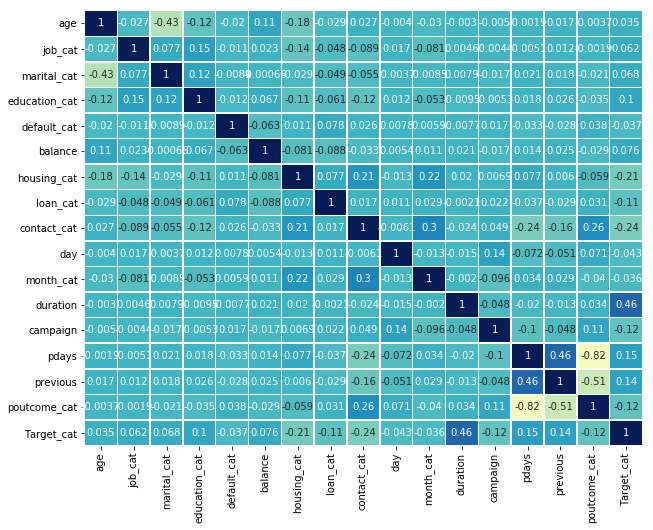

In [168]:
plt.figure(figsize=(10,8))
sns.heatmap(bank_df_rev.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

#### A strong corelation is observed between the Target variable and following attributes
* 46% correlation between TARGET_CAT and DURATION
* 24% correlation between TARGET_CAT and CONTACT_CAT
* 21% correlation between TARGET_CAT and HOUSING_CAT
* 15% correlation between TARGET_CAT and PDAYS
* 14% correlation between TARGET_CAT and PREVIOUS
* 12% correlation between TARGET_CAT and CAMPAIGN
* 12% correlation between TARGET_CAT and POUTCOME_CAT

### Data Splitting
#### Split data into Training and Test set in the ratio 70:30

In [169]:
# Arrange data into independent variables and dependent variables
X = bank_df_rev.values[:,:16]  ## Features
y = bank_df_rev.values[:,16]  ## Target
# Split the data into train and test
# Train data size: 70% of original data
# Test data size: 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

## Model 1 : Simple Classification Models - Logistic Regression

In [170]:
# Logistic Model

from sklearn.linear_model import LogisticRegression

Logistic_Model = LogisticRegression()
Logistic_Model.fit(X_train,y_train)
y_LM_predict = Logistic_Model.predict(X_test)
model_score = Logistic_Model.score(X_test, y_test)
print(metrics.classification_report(y_test,y_LM_predict))
print(model_score)
print(metrics.confusion_matrix(y_test,y_LM_predict))

C:\Users\ayshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.81      0.87      0.84     11981
           1       0.78      0.70      0.74      7930

   micro avg       0.80      0.80      0.80     19911
   macro avg       0.79      0.78      0.79     19911
weighted avg       0.80      0.80      0.80     19911

0.7998091507207071
[[10369  1612]
 [ 2374  5556]]


## Model 2 : Simple Classification Models - Naive Bayes Model


In [171]:
# Naive Bayes Model

from sklearn.naive_bayes import GaussianNB

NaiveBayes_Model = GaussianNB() 
NaiveBayes_Model.fit(X_train, y_train)
print(NaiveBayes_Model)
y_NB_predicted = NaiveBayes_Model.predict(X_test)
print(metrics.classification_report(y_test,y_NB_predicted))
print(NaiveBayes_Model.score(X_test, y_test))
print(metrics.confusion_matrix(y_test,y_NB_predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.82      0.76      0.79     11981
           1       0.67      0.76      0.71      7930

   micro avg       0.76      0.76      0.76     19911
   macro avg       0.75      0.76      0.75     19911
weighted avg       0.76      0.76      0.76     19911

0.7572196273416705
[[9084 2897]
 [1937 5993]]


## Conclusion : Naive Bayes is a better predictor
### Although Logistic Regression has a higher overall accuracy of 79.98% as compared to Naive Bayes (that has overall accuracy of 75.72%), we could go for Naive Bayes as a better predictor model since the class accuracy matrix denotes the Recall to be higher for Naive Bayes at 76% as compared to the Recall of Logistic Regression which is 70%

## Ensemble Models

#### Decision Tree model is going to be the base model 

In [24]:
# Decision Tree Model

DTModel_entropy=DecisionTreeClassifier(criterion='entropy')
DTModel_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
DTModel_entropy.score(X_train, y_train)  # performance on train data

1.0

In [26]:
DTModel_entropy.score(X_test, y_test)  # performance on test data

0.9470142132489578

####  * The performace on Training Data is 100% - indicating overfitting
#### * Performance on Test Data is 94.7% - better than ordinary classification model

### The Decision Tree needs Regularization / Pruning in order to take care of Overfitting as well as overall performance

In [123]:
DT_pruned = DecisionTreeClassifier( criterion = "entropy", random_state = 50,
                               max_depth=19, min_samples_leaf=5)
DT_pruned.fit(X_train, y_train)
print(DT_pruned)

# y_predict_test_pruned = DT_pruned.predict(X_test)
# y_predict_train_pruned = DT_pruned.predict(X_train)

print(DT_pruned.score(X_train, y_train))
print(DT_pruned.score(X_test, y_test))

# print(accuracy_score(y_train,y_predict_train_pruned))
# print(accuracy_score(y_test,y_predict_test_pruned))
# 0.9443559497158601
# 0.8917181457485812

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=19,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')
0.9443559497158601
0.8917181457485812


#### Pruning has improved the overfitting problem, however the accuarcy has gone down
#### Hyperparameters used for pruning
* criterion='entropy'
* max_depth=19
* min_samples_leaf=5 
* random_state=50

#### Tweaking the hyperparameters further by changing the criterion='gini'

In [124]:
DT_gini_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=19, min_samples_leaf=5)
DT_gini_pruned.fit(X_train, y_train)
print (DT_gini_pruned)

# y_predict_test_Gpruned = DT_gini_pruned.predict(X_test)
# y_predict_train_Gpruned = DT_gini_pruned.predict(X_train)

print(DT_gini_pruned.score(X_train, y_train))
print(DT_gini_pruned.score(X_test, y_test))

# print(accuracy_score(y_train,y_predict_train_Gpruned))
# print(accuracy_score(y_test,y_predict_test_Gpruned))
# 0.9473480282417772
# 0.8893576415046959

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=19,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')
0.9473480282417772
0.8893576415046959


#### Compared to Entropy, Gini does not improve performance

### Feature Selection using Feature Importance for a Decision Tree
#### Feature Selection is a really important step in model building since it helps to eliminate the attributes that have least effect on the Traget variable

In [90]:
## Calculating feature importance

Imp_features = DT_pruned.tree_.compute_feature_importances(normalize=False)
X_variables = bank_df_rev.drop('Target_cat', axis=1)
feature_cols = X_variables.columns
imp_feature_dict = dict(zip(feature_cols, DT_pruned.feature_importances_))
imp_feature = pd.DataFrame.from_dict(imp_feature_dict, orient='index')
imp_feature.sort_values(by=0, ascending=False)

,0
duration,0.352361
month_cat,0.118192
contact_cat,0.084485
balance,0.077628
day,0.077251
age,0.074287
pdays,0.063843
housing_cat,0.037748
job_cat,0.027413
campaign,0.024887


### The following features are the least significant fro model building
since they have feature importance < 0.01
* MARITAL_CAT
* LOAN_CAT
* DEFAULT_CAT

### Bagging Technique for Model

In [126]:
# Bagging Ensemble Model

from sklearn.ensemble import BaggingClassifier

bag_label = X
bag_feature = y

bag_Model = BaggingClassifier(n_estimators=100, max_samples=.7 , oob_score=False)
# bag_Model = bag_Model.fit(bag_label, bag_feature)
# print(bag_Model.oob_score_)
# 0.9580665089577651
bag_Model = bag_Model.fit(X_train, y_train)
print(bag_Model.score(X_test, y_test))

0.9462608608306966


#### Observations :
* Accuracy = 94.62%


### ADA Boosting Technique for Model

In [115]:
# Ada Boost Ensembel Model

from sklearn.ensemble import AdaBoostClassifier

Ada_Model = AdaBoostClassifier(base_estimator=DT_pruned, n_estimators=100, random_state=50)
#abcl = AdaBoostClassifier(n_estimators=50)
Ada_Model = Ada_Model.fit(X_train, y_train)



In [116]:
Ada_pred = Ada_Model.predict(X_test)
Ada_Model.score(X_test , y_test)
# print(Ada_Model)

0.9702174677314047

#### Observations :
* Accuracy = 97.02%

### Gradient Boosting

In [129]:
# Gradient Boost Ensemble Model

from sklearn.ensemble import GradientBoostingClassifier

Gra_Model = GradientBoostingClassifier (n_estimators = 100, learning_rate = 0.09, max_depth=19, random_state=50)
Gra_Model = Gra_Model.fit(X_train, y_train)

In [130]:
Gra_pred = Gra_Model.predict(X_test)
Gra_Model.score(X_test , y_test)

0.9596203103811963

#### Observations :
* Accuracy = 95.96%

### Random Forest

In [131]:
# Random Forest Ensemble Model

from sklearn.ensemble import RandomForestClassifier

RandomForest_Model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', 
                                            max_depth = 19, min_samples_leaf=5, random_state = 50)
RandomForest_Model = RandomForest_Model.fit(X_train, y_train)

In [132]:
RandomForest_pred = RandomForest_Model.predict(X_test)
RandomForest_Model.score(X_test , y_test)

0.9195921852242479

#### Observations :
* Accuracy = 91.95%

### Hyperparameters mostly used
* n_estimators
* max_depth
* min_samples_leaf
* random_state